<a href="https://colab.research.google.com/github/Akashn007/Akash_Kumar_N_INBT03975_AUG_2023/blob/main/Cifer10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task 2: CIFAR-10 Dataset

##Dataset preparation

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import datasets



##Model architecture and training

In [2]:
import tensorflow as tf
from keras.datasets import cifar10
from matplotlib import pyplot
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
#loading dataset
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()
#spliting of dataset
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.2)
print("train data: ",xtrain.shape)
print("test data: ",xtest.shape)

170498071/170498071 [==============================] - 4s 0us/step
train data:  (40000, 32, 32, 3)
test data:  (10000, 32, 32, 3)


In [3]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras
from keras.models import Sequential
from tensorflow.keras import datasets,layers,models
from keras import regularizers
from keras.layers import Dense,Dropout,BatchNormalization
print(np.unique(ytrain))
print(np.unique(ytest))




[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [4]:
num_classes = len(np.unique(ytrain))
Y_train_encoded = to_categorical(y_train, num_classes)
Y_test_encoded = to_categorical(y_test, num_classes)
#normalize pixel values
xtrain,xtest=xtrain/255.0, xtest/255.0

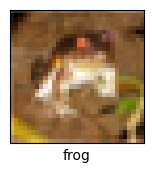

In [5]:
#verifying data
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(1):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i][0]])
plt.show()

##VGG19 model

In [6]:
#VGG19 model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

base_model = VGG19(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

80134624/80134624 [==============================] - 1s 0us/step


##CNN model

In [7]:
#CNN model
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.MaxPooling2D((2,2)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

##Compiling and Training the model

Training the CNN

In [9]:
#compiling and trainig the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 23s 6ms/step - loss: 1.6364 - accuracy: 0.4467 - val_loss: 1.2744 - val_accuracy: 0.5460
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1399 - accuracy: 0.5995 - val_loss: 1.1558 - val_accuracy: 0.6000
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0125 - accuracy: 0.6471 - val_loss: 1.0947 - val_accuracy: 0.6240
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9282 - accuracy: 0.6771 - val_loss: 1.0137 - val_accuracy: 0.6528
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8467 - accuracy: 0.7067 - val_loss: 0.9932 - val_accuracy: 0.6696
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7796 - accuracy: 0.7296 - val_loss: 1.0341 - val_accuracy: 0.6566
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7205 - accuracy: 0.7510 - val_loss: 0.9735 - val_accur

In [30]:
result=model.evaluate(x_test,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 2.5754 - accuracy: 0.0971


In [12]:
import time
start_time=time.time()
print(start_time)

1694788221.2752426


In [25]:
training_time=time.time()-start_time

##Evaluation

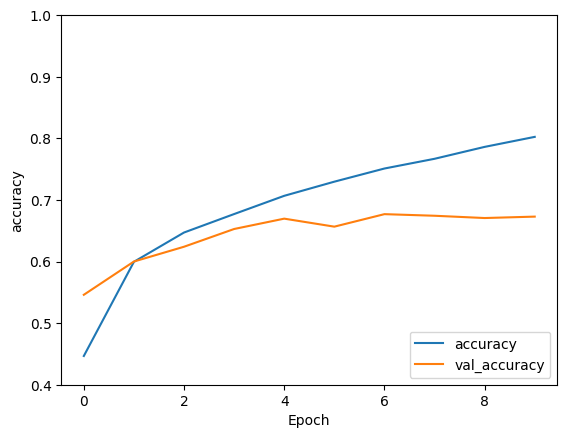

In [13]:
#evaluating the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim([0.4,1])
plt.legend(loc='lower right')
losses,acc=model.evaluate(x_test,y_test,verbose=3)

In [14]:
print('accuracy: {:.2f}%'.format(acc*100))

accuracy: 67.29%


##Confusion Matrix

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
prediction=model.predict(x_test)
true_value=np.argmax(prediction,axis=1)
conf_matrix = confusion_matrix(y_test, true_value)
print(conf_matrix)
print("accuracy:",accuracy_score(y_test,true_value)*100)
print("report:",classification_report(y_test,true_value))

313/313 [==============================] - 1s 2ms/step
[[722  38  76  13  20   5  13   7  66  40]
 [ 13 842   1   7   2   3  12   3  29  88]
 [ 61  23 565  54  98  29  94  46  15  15]
 [ 28  23 100 466  65 101 115  53  23  26]
 [ 18   6  92  71 607  14 100  70  10  12]
 [  9  20  71 168  68 496  73  71  10  14]
 [ 11   9  57  40  31   8 819   8   5  12]
 [ 17  10  36  50  98  33  26 685   8  37]
 [ 97  60  17   4   8   7  11   2 740  54]
 [ 25 123   6   9   9   3   4   7  27 787]]
accuracy: 67.29
report:               precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.73      0.84      0.78      1000
           2       0.55      0.56      0.56      1000
           3       0.53      0.47      0.50      1000
           4       0.60      0.61      0.61      1000
           5       0.71      0.50      0.58      1000
           6       0.65      0.82      0.72      1000
           7       0.72      0.69      0.70      1000
   

In [16]:
#confusion matirx
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center', fontsize=12, weight='bold',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [17]:
def plot_normalized_confusion_matrix(cm, classes, title='Normalized Confusion Matrix', cmap=plt.cm.Blues):
    plot_confusion_matrix(cm, classes, normalize=True, title=title, cmap=cmap)
def plot_unnormalized_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plot_confusion_matrix(cm, classes, normalize=False, title=title, cmap=cmap)

Normalized Confusion Matrix


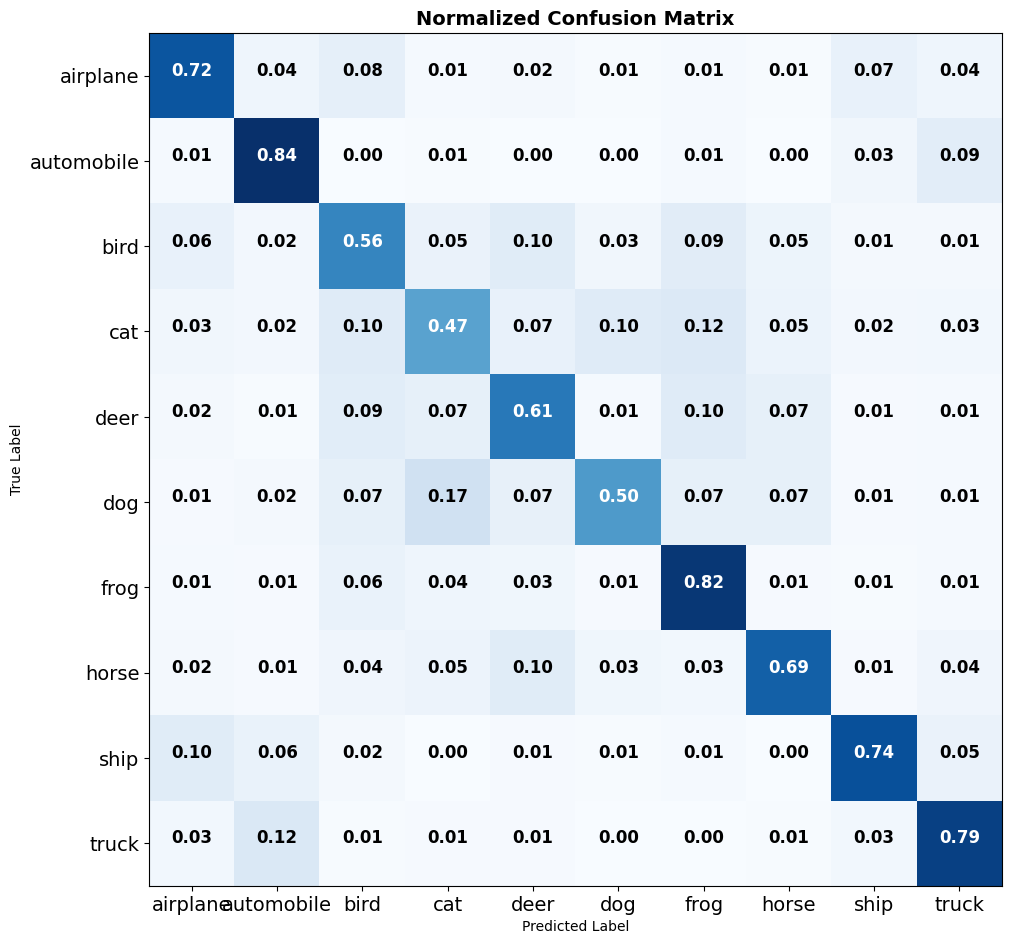

without normalization


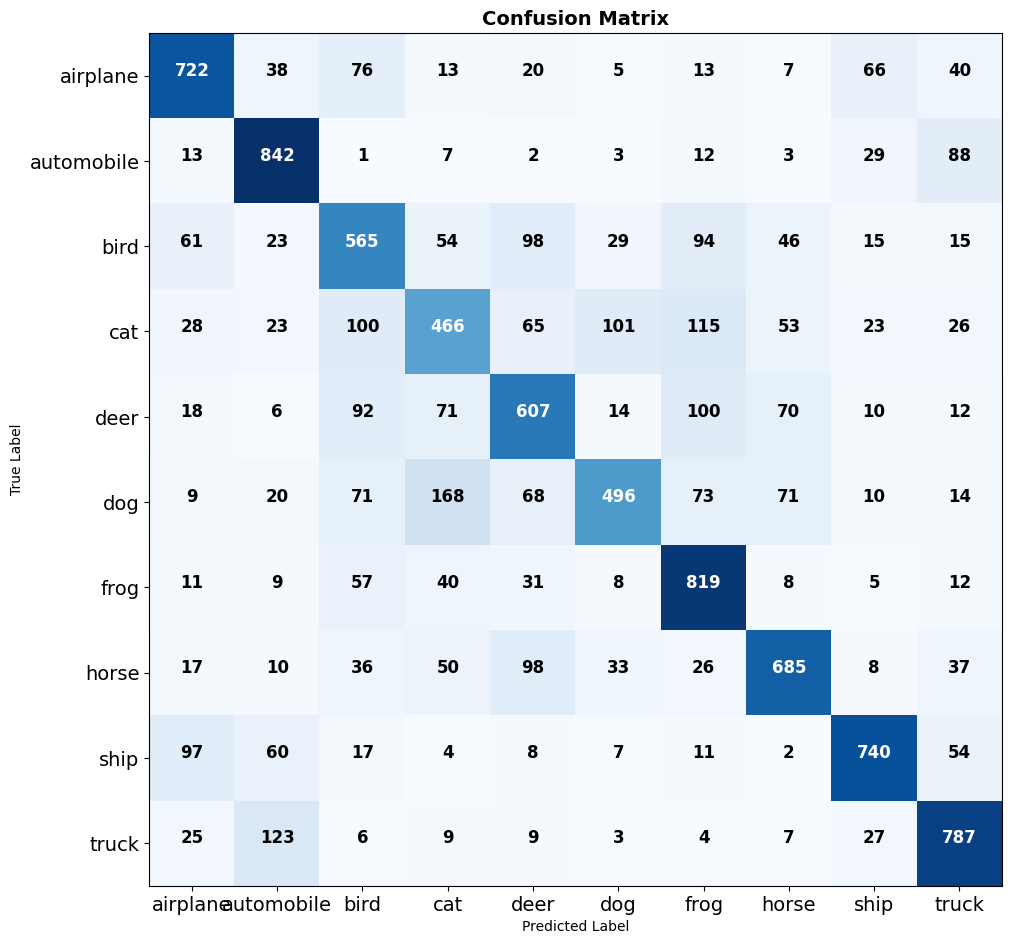

In [18]:
#plotting the graphes
plt.figure(figsize=(10, 10))
plot_normalized_confusion_matrix(conf_matrix, classes=classes, title='Normalized Confusion Matrix')
plt.show()

plt.figure(figsize=(10, 10))
plot_unnormalized_confusion_matrix(conf_matrix, classes=classes, title='Confusion Matrix')
plt.show()

In [19]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f'Test accuracy: {test_accuracy:.2f}')

313/313 [==============================] - 1s 3ms/step - loss: 1.0720 - accuracy: 0.6729
Test accuracy: 0.67


In [20]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0720 - accuracy: 0.6729


[1.0720360279083252, 0.6729000210762024]

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import  Model
x=Flatten()(base_model.output)
x=Dense(128,activation='relu')(x)
x=Dropout(0.5)(x)
output=Dense(10,activation='softmax')(x)
vgg19_model=Model(base_model.input,output)

In [22]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [24]:
from tensorflow.keras.optimizers import Adam
vgg19_model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
vgg19_model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)


Epoch 1/10
1250/1250 [==============================] - 52s 36ms/step - loss: 2.3040 - accuracy: 0.1009 - val_loss: 2.3046 - val_accuracy: 0.1014
Epoch 2/10
1250/1250 [==============================] - 49s 39ms/step - loss: 2.3041 - accuracy: 0.0977 - val_loss: 2.3029 - val_accuracy: 0.0980
Epoch 3/10
1250/1250 [==============================] - 48s 38ms/step - loss: 2.3042 - accuracy: 0.0987 - val_loss: 2.3038 - val_accuracy: 0.1003
Epoch 4/10
1250/1250 [==============================] - 46s 36ms/step - loss: 2.3039 - accuracy: 0.0969 - val_loss: 2.3034 - val_accuracy: 0.1022
Epoch 5/10
1250/1250 [==============================] - 51s 41ms/step - loss: 2.3038 - accuracy: 0.1014 - val_loss: 2.3053 - val_accuracy: 0.1014
Epoch 6/10
1250/1250 [==============================] - 48s 38ms/step - loss: 2.3039 - accuracy: 0.0997 - val_loss: 2.3043 - val_accuracy: 0.0980
Epoch 7/10
1250/1250 [==============================] - 51s 41ms/step - loss: 2.3040 - accuracy: 0.0972 - val_loss: 2.3033 -

In [26]:
vgg19_model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 2.3032 - accuracy: 0.1000


[2.3031928539276123, 0.10000000149011612]

In [27]:
vgg19_result=vgg19_model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 2.3032 - accuracy: 0.1000


In [28]:
vgg19_time=time.time()-start_time

Comparing of CNN and Transfer learning Model

In [31]:
print('CNN test accuracy:',result )
print('VGG19 test accuracy:',vgg19_result)
print('CNN training time:',training_time,'seconds')
print('VGG19 training time:',vgg19_time,'seconds')

CNN test accuracy: [2.5754032135009766, 0.09709999710321426]
VGG19 test accuracy: [2.3031928539276123, 0.10000000149011612]
CNN training time: 850.4253888130188 seconds
VGG19 training time: 885.5718667507172 seconds
